# Analytics

In [21]:
import pandas as pd

For the analytics we are not interests in the names of the characters, so, only the quantitative data are maintained: 

In [22]:
df = pd.read_csv("results/full_corpus_results.csv", encoding="utf8")
df = df.drop(["male_characters_names", "female_characters_names", "unknown_gender_names"], axis='columns')
df

,book_title,male_characters,female_characters,none,authors_sex
0,1883_molesworth-the-boys-and-i-a-childs-story-...,4,5,0,female
1,1905_meade-a-plain-girl,17,39,2,female
2,1890_meade-the-honorable-miss-a-story-of.an-ol...,25,43,9,female
3,1856_yonge-the-daisy-chain-or-aspirations,113,71,17,female
4,1876_molesworth-carrots-just-a-little-boy,7,6,1,female
...,...,...,...,...,...
261,1910_kipling-rewards-and-fairies,127,39,16,male
262,1911_collingwood-a-middy-of-the-king-a-romance...,66,20,6,male
263,1911_collingwood-the-adventures-of-dick-maitla...,40,8,9,male
264,1912_collingwood-two-gallant-sons-of-davon-a-t...,27,8,7,male


##### Firstly, we add some information to our dataframes. Some functions have been here defined in order to better understand the differences in terms of number of charcaters used in different books. Also the publication date and period is extracted in order to allow some specific visualizations.

In [23]:
def where_more_characters(df):
    list_for_series = []
    for idx, row in df.iterrows():
        if row["male_characters"] > row["female_characters"]:
            list_for_series.append("male")
        elif row["male_characters"] < row["female_characters"]:
            list_for_series.append("female")
        else:
            list_for_series.append("balanced")
    df["gender_of_most_numerous_characters"] = list_for_series
    return total_number_and_characters_difference(df)


def total_number_and_characters_difference(df):     #this function needs to be runned after the previous one
    tots_list = []
    diff_list = []
    for idx, row in df.iterrows():
        tots_list.append(row["male_characters"]+row["female_characters"])
        diff_list.append(abs(row["male_characters"]-row["female_characters"]))
    df["total_gendered_characters"] = tots_list
    df["difference_between_gendered_characters"] = diff_list
    return df

def publication_date(df):
    publication_dates = []
    publication_period = []
    for idx, row in df.iterrows():
        year = row["book_title"].split("_")[0]
        period = "1"+year[1]+year[2]+"0-1"+year[1]+year[2]+"9"
        publication_dates.append(year)
        publication_period.append(period)
    df["publication_period"] = publication_period    
    df["publication_year"] = publication_dates
    return df

In [24]:
where_more_characters(df)
publication_date(df)

,book_title,male_characters,female_characters,none,authors_sex,gender_of_most_numerous_characters,total_gendered_characters,difference_between_gendered_characters,publication_period,publication_year
0,1883_molesworth-the-boys-and-i-a-childs-story-...,4,5,0,female,female,9,1,1880-1889,1883
1,1905_meade-a-plain-girl,17,39,2,female,female,56,22,1900-1909,1905
2,1890_meade-the-honorable-miss-a-story-of.an-ol...,25,43,9,female,female,68,18,1890-1899,1890
3,1856_yonge-the-daisy-chain-or-aspirations,113,71,17,female,male,184,42,1850-1859,1856
4,1876_molesworth-carrots-just-a-little-boy,7,6,1,female,male,13,1,1870-1879,1876
...,...,...,...,...,...,...,...,...,...,...
261,1910_kipling-rewards-and-fairies,127,39,16,male,male,166,88,1910-1919,1910
262,1911_collingwood-a-middy-of-the-king-a-romance...,66,20,6,male,male,86,46,1910-1919,1911
263,1911_collingwood-the-adventures-of-dick-maitla...,40,8,9,male,male,48,32,1910-1919,1911
264,1912_collingwood-two-gallant-sons-of-davon-a-t...,27,8,7,male,male,35,19,1910-1919,1912


In [26]:
df_m = df.query("authors_sex == 'male'")
df_f = df.query("authors_sex == 'female'")

In [27]:
character_usage_timeline_df = df[["publication_period", "male_characters", "female_characters", "none"]].sort_values(by=['publication_period'])
cutdf_f = df_f[["publication_period", "male_characters", "female_characters", "none"]].sort_values(by=['publication_period'])
cutdf_m = df_m[["publication_period", "male_characters", "female_characters", "none"]].sort_values(by=['publication_period'])

In [28]:
f = character_usage_timeline_df.groupby("publication_period").sum().apply(lambda x: x*100/sum(x), axis=1)
f

,male_characters,female_characters,none
publication_period,,,
1830-1839,73.053892,25.149701,1.796407
1840-1849,67.021277,28.723404,4.255319
1850-1859,67.275616,23.669579,9.054805
1860-1869,64.141414,30.934343,4.924242
1870-1879,62.630313,30.232558,7.137129
1880-1889,62.150747,28.882391,8.966862
1890-1899,55.636659,36.050284,8.313058
1900-1909,50.660793,43.045941,6.293266
1910-1919,60.598179,31.729519,7.672302


In [29]:
cutdf_f = cutdf_f.groupby("publication_period").sum().apply(lambda x: x*100/sum(x), axis=1) #.plot.bar(stacked=True, figsize=(20,10), fontsize=20, rot=0)
cutdf_f

,male_characters,female_characters,none
publication_period,,,
1830-1839,73.015873,25.396825,1.587302
1840-1849,68.421053,21.052632,10.526316
1850-1859,62.519685,29.921260,7.559055
1860-1869,59.529412,36.000000,4.470588
1870-1879,55.599214,39.096267,5.304519
1880-1889,49.632353,44.301471,6.066176
1890-1899,49.486804,44.648094,5.865103
1900-1909,44.568966,50.086207,5.344828
1910-1919,46.598639,50.000000,3.401361


In [30]:
cutdf_m = cutdf_m.groupby("publication_period").sum().apply(lambda x: x*100/sum(x), axis=1) #.plot.bar(stacked=True, figsize=(20,10), fontsize=20, rot=0)
cutdf_m

,male_characters,female_characters,none
publication_period,,,
1830-1839,73.076923,25.000000,1.923077
1840-1849,66.863905,29.585799,3.550296
1850-1859,72.115385,17.307692,10.576923
1860-1869,69.482289,25.068120,5.449591
1870-1879,67.479675,24.119241,8.401084
1880-1889,68.994975,20.452261,10.552764
1890-1899,63.248639,25.408348,11.343013
1900-1909,67.132867,24.009324,8.857809
1910-1919,69.263158,20.421053,10.315789


In [31]:
df.value_counts("gender_of_most_numerous_characters")

gender_of_most_numerous_characters
male        182
female       67
balanced     17
dtype: int64

In [32]:
df_m.value_counts("gender_of_most_numerous_characters")

gender_of_most_numerous_characters
male        104
balanced      3
female        2
dtype: int64

In [33]:
df_f.value_counts("gender_of_most_numerous_characters")

gender_of_most_numerous_characters
male        78
female      65
balanced    14
dtype: int64

<AxesSubplot:xlabel='authors_sex'>

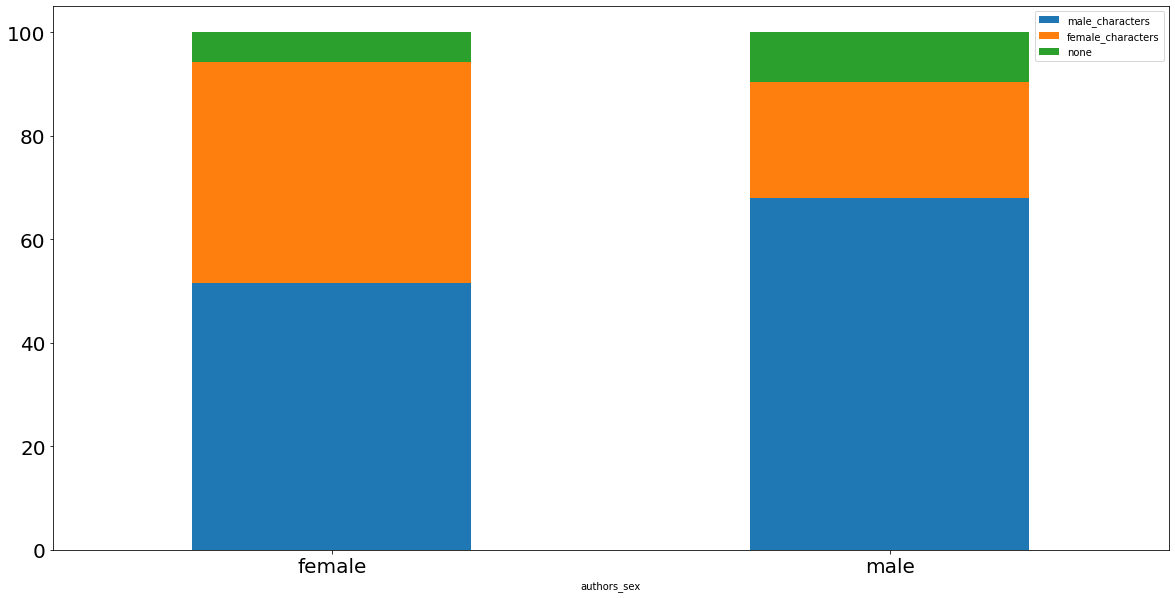

In [34]:
reduced_df = df[["authors_sex","male_characters", "female_characters", "none"]]
reduced_df.groupby("authors_sex").sum().apply(lambda x: x*100/sum(x), axis=1).plot.bar(stacked=True, figsize=(20,10), fontsize=20, rot=0)

<AxesSubplot:>

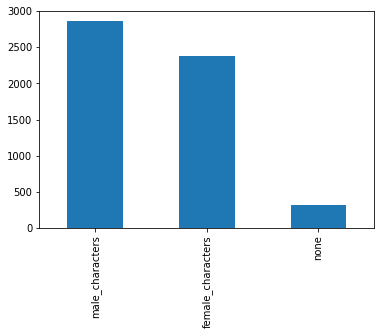

In [35]:
df_f[["male_characters", "female_characters", "none"]].sum().plot.bar()

<AxesSubplot:>

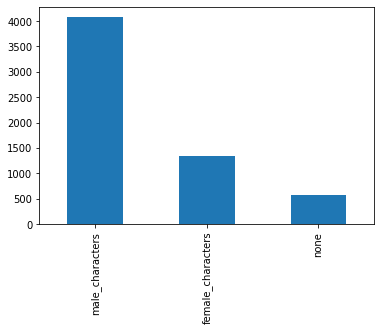

In [36]:
df_m[["male_characters", "female_characters", "none"]].sum().plot.bar()

In [37]:
df_f_before_1880 = df_f.query("publication_year < '1880'")
df_f_after_1880 = df_f.query("publication_year >= '1880'")
df_m_before_1880 = df_m.query("publication_year < '1880'")
df_m_after_1880 = df_m.query("publication_year >= '1880'")

### !!!!calcola l'incremento percentuale!!!

<AxesSubplot:ylabel='None'>

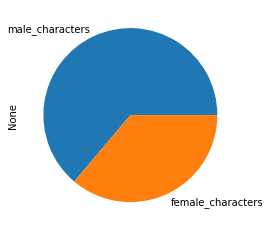

In [38]:
df_f_before_1880[["male_characters", "female_characters"]].sum().plot.pie()

<AxesSubplot:ylabel='None'>

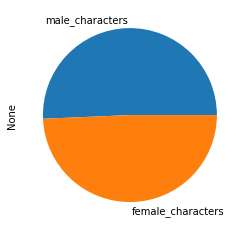

In [39]:
df_f_after_1880[["male_characters", "female_characters"]].sum().plot.pie()

<AxesSubplot:ylabel='None'>

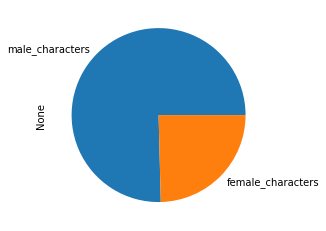

In [40]:
df_m_before_1880[["male_characters", "female_characters"]].sum().plot.pie()

<AxesSubplot:ylabel='None'>

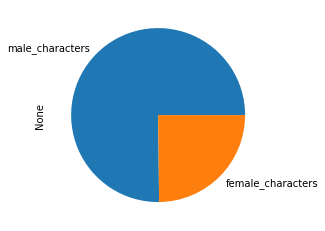

In [41]:
df_m_after_1880[["male_characters", "female_characters"]].sum().plot.pie()